In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/uber-fares-dataset/uber.csv


**Data Inspection** <br>
First we will inspect the data including some samples of data, dypes, columns renaming and missing values identification.

In [2]:
df = pd.read_csv('/kaggle/input/uber-fares-dataset/uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


Let's rename the Unnamed to Id and remove the key column as it duplicate of the pickup_datetime

In [4]:
df = df.rename(columns={"Unnamed: 0": "Id"})
df = df.drop(columns = ['key'])

In [5]:
df.head()

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ MB


As the info shows that the two cols has missing values. Let's find them.

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

Id                   0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


The dropoff_longitued and dropoff_latitude column has 1 missing value. first we will identify and analyze it.

In [8]:
rows_with_missing = df[df.isnull().any(axis=1)]
rows_with_missing.head()

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,32736015,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


since this is only one row and passenger_count is also 0, and key is datatime it is a mistake and will remove it.

In [9]:
df = df.dropna()

# Verify that there are no more missing values
print(df.isnull().sum())

Id                   0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


Now let's look at dypes.

Since you can see that pickup_datetime is object lets convert it to datetime. first we will import datatime.

In [10]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [11]:
df['pickup_datetime'].head()

0   2015-05-07 19:52:06+00:00
1   2009-07-17 20:04:56+00:00
2   2009-08-24 21:45:00+00:00
3   2009-06-26 08:22:21+00:00
4   2014-08-28 17:47:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

**distance column** <br>
As we latitude and longitude and did'nt have the distance column, so let's create one from it.

In [12]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers

    # Convert degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c

    return distance

# Apply the function to calculate distance for each row
df['distance_km'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                              df['dropoff_latitude'], df['dropoff_longitude'])

In [13]:
df.head()

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


**Exploratory Data Analysis (EDA):** <br>
Let explore some statistics of the data. 

In [14]:
df.describe()

,Id,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,20.855350
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,382.964642
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.215222
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2.120992
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,3.875169
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135


There are significant outliers in fare_amount, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, and passenger_count. For example the minimum fare_amount is -52 (clearly an outlier) and max is 499(too high, an outlier).

**Visualizations** <br>
Let's create some box plots to find outliers in the dataset and histograms for finding the distribution of the data.

<Axes: title={'center': 'distance in km'}, xlabel='distance_km'>

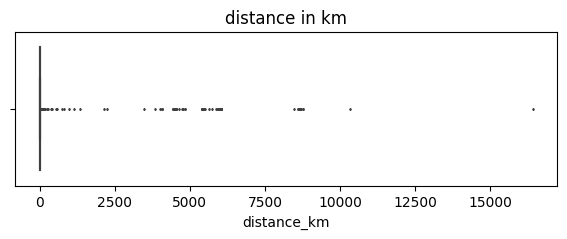

In [15]:
plt.figure(figsize=(7,2))
plt.title('distance in km')
sns.boxplot(data=df, x='distance_km', fliersize=1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


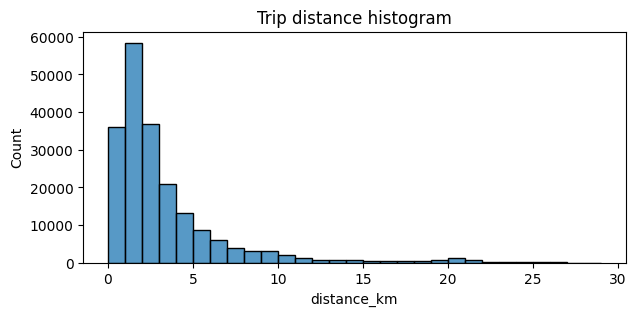

In [16]:
# Create histogram of trip_distance
plt.figure(figsize=(7,3))
sns.histplot(df['distance_km'], bins=range(0,30,1))
plt.title('Trip distance histogram');

The visualization shows that majority of the trips distance were less than 5km.

<Axes: title={'center': 'fare amount'}, xlabel='fare_amount'>

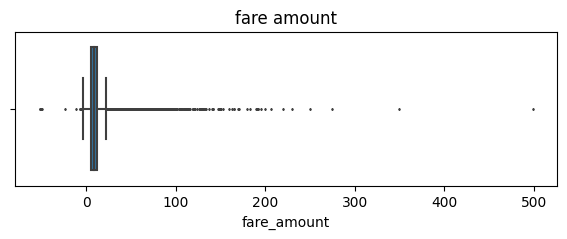

In [17]:
plt.figure(figsize=(7,2))
plt.title('fare amount')
sns.boxplot(data=df, x='fare_amount', fliersize=1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


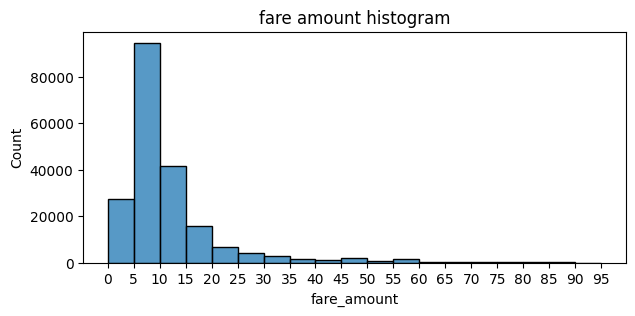

In [18]:
plt.figure(figsize=(7,3))
ax = sns.histplot(df['fare_amount'],bins=range(0,100,5))
ax.set_xticks(range(0,100,5))
ax.set_xticklabels(range(0,100,5))
plt.title('fare amount histogram');

The fare amount is skewed to the right. and the visualization shows that majority of the trips has fare amount of 5-20 dollars.

<Axes: title={'center': 'passenger count'}, xlabel='passenger_count'>

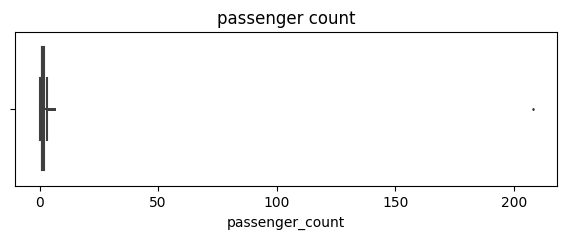

In [19]:
plt.figure(figsize=(7,2))
plt.title('passenger count')
sns.boxplot(data=df, x='passenger_count', fliersize=1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


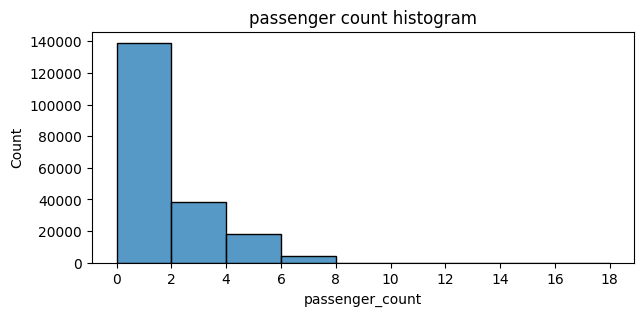

In [20]:
plt.figure(figsize=(7,3))
ax = sns.histplot(df['passenger_count'],bins=range(0,20,2))
ax.set_xticks(range(0,20,2))
ax.set_xticklabels(range(0,20,2))
plt.title('passenger count histogram');

so the 2 passenger per trip is in majority and the passengers counts are upto 8.

**Mean fare amount by passenger count** 

Now let's examine the fare amount with passenger count.

In [21]:
df['passenger_count'].value_counts()

passenger_count
1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         708
208         1
Name: count, dtype: int64

In [22]:
mean_fares_by_passenger_count = df.groupby(['passenger_count']).mean()[['fare_amount']]
mean_fares_by_passenger_count

,fare_amount
passenger_count,
0,9.439266
1,11.254158
2,11.784452
3,11.486731
4,11.642472
5,11.199698
6,12.158537
208,11.700000


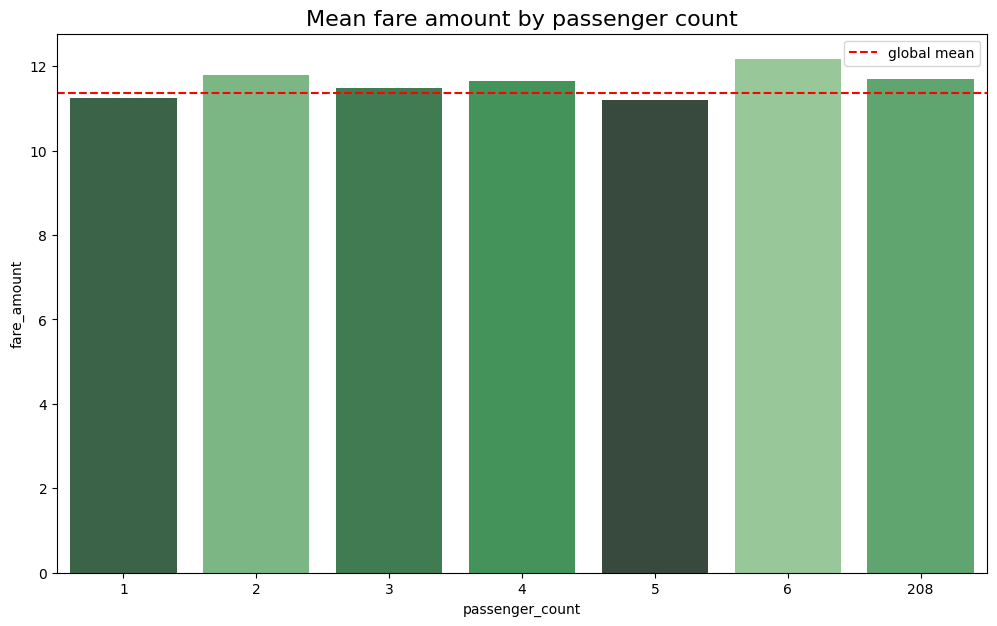

In [23]:
data = mean_fares_by_passenger_count.tail(-1)
pal = sns.color_palette("Greens_d", len(data))
rank = data['fare_amount'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
            y=data['fare_amount'],
            palette=np.array(pal[::-1])[rank])
ax.axhline(df['fare_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean fare amount by passenger count', fontsize=16);

**Create month and day columns**

In [24]:
# Create a month column
df['month'] = df['pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['pickup_datetime'].dt.day_name()

In [25]:
monthly_rides = df['month'].value_counts()
monthly_rides

month
May          18859
March        18763
April        18606
June         17787
January      17668
February     16695
October      16212
December     15516
November     15312
September    15266
July         15094
August       14221
Name: count, dtype: int64

In [26]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      17668
February     16695
March        18763
April        18606
May          18859
June         17787
July         15094
August       14221
September    15266
October      16212
November     15312
December     15516
Name: count, dtype: int64

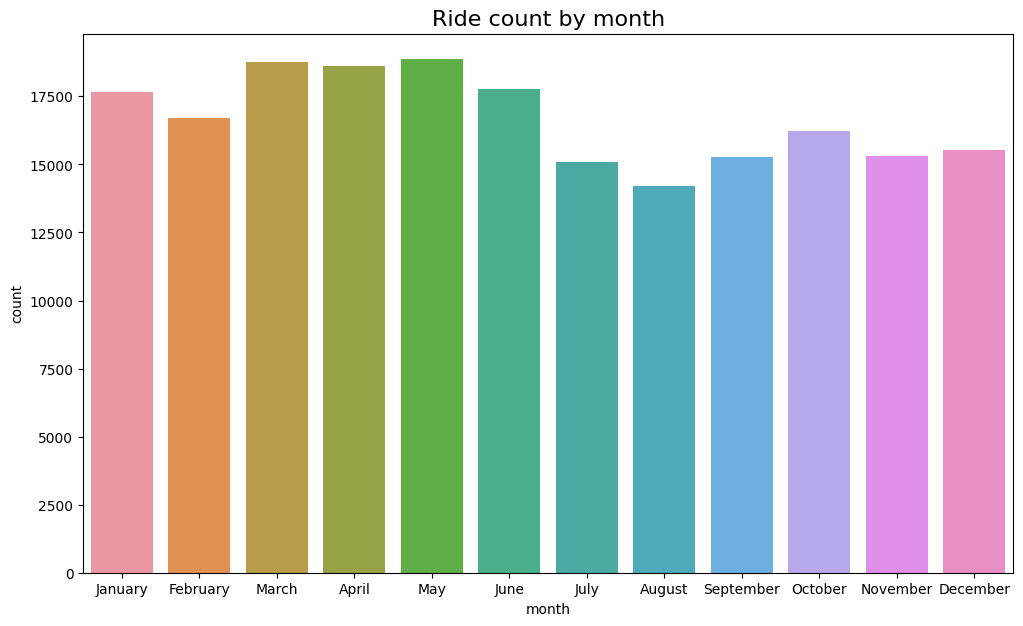

In [27]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);

The monthly rides are consistent but the summer months July, august and september has some dips.

**Analyzing rides by day**

In [28]:
daily_rides = df['day'].value_counts()

In [29]:
day_order = ["Monday",'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_rides.reindex(index=day_order)

day
Monday       25243
Tuesday      28126
Wednesday    29037
Thursday     30021
Friday       30880
Saturday     30251
Sunday       26441
Name: count, dtype: int64

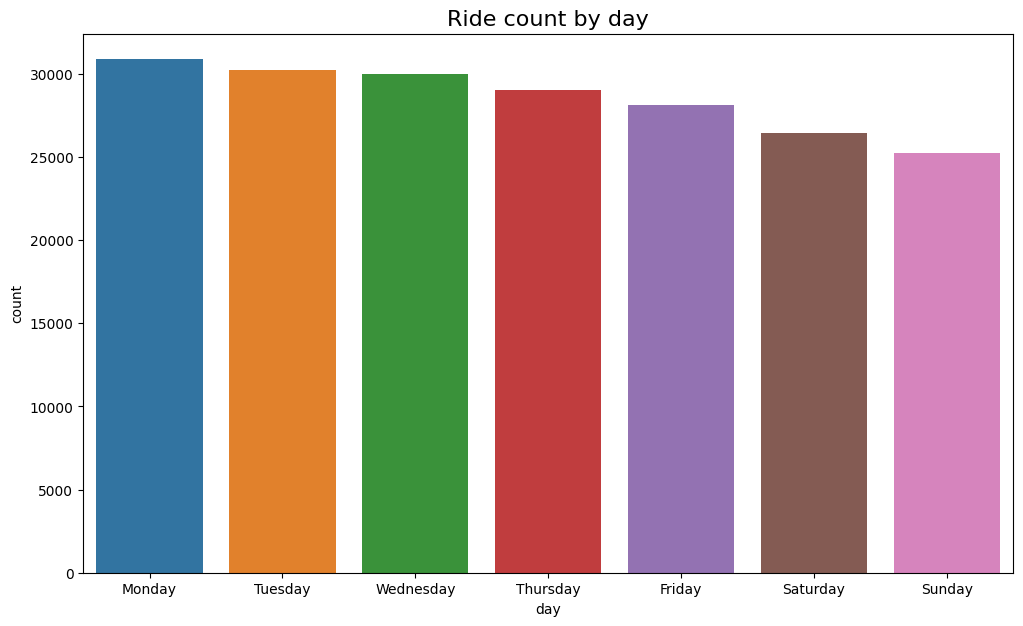

In [30]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_xticklabels(day_order)
plt.title('Ride count by day', fontsize=16);

So monday has alot of rides which is obviously start of the week and saturday and sunday has dips dues to holidays.

**Revenue per day**

In [31]:
df_without_date = df.drop(columns=['pickup_datetime'])

In [32]:
total_amount_per_day = df_without_date.groupby(by='day').sum()[['fare_amount']]
total_amount_per_day = total_amount_per_day.reindex(index=day_order)

In [33]:
total_amount_per_day

,fare_amount
day,
Monday,287228.19
Tuesday,311504.73
Wednesday,329608.38
Thursday,345774.92
Friday,353260.80
Saturday,333737.30
Sunday,310852.63


Text(0.5, 1.0, 'Revenue by day')

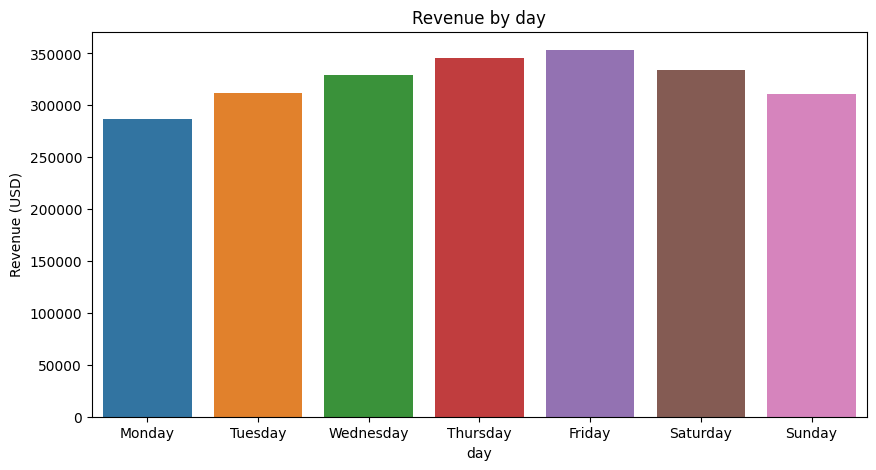

In [34]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=total_amount_per_day.index,y=total_amount_per_day['fare_amount'])
ax.set_xticklabels(day_order)
ax.set_ylabel("Revenue (USD)")
plt.title("Revenue by day")

**Revenue by month**

In [35]:
total_amount_per_month = df_without_date.groupby(by='month').sum()[['fare_amount']]
total_amount_per_month = total_amount_per_month.reindex(index=month_order)
total_amount_per_month

,fare_amount
month,
January,189499.77
February,182453.99
March,208300.37
April,210972.89
May,220246.02
June,206421.84
July,168454.49
August,159351.40
September,180011.21


Text(0.5, 1.0, 'Revenue by Month')

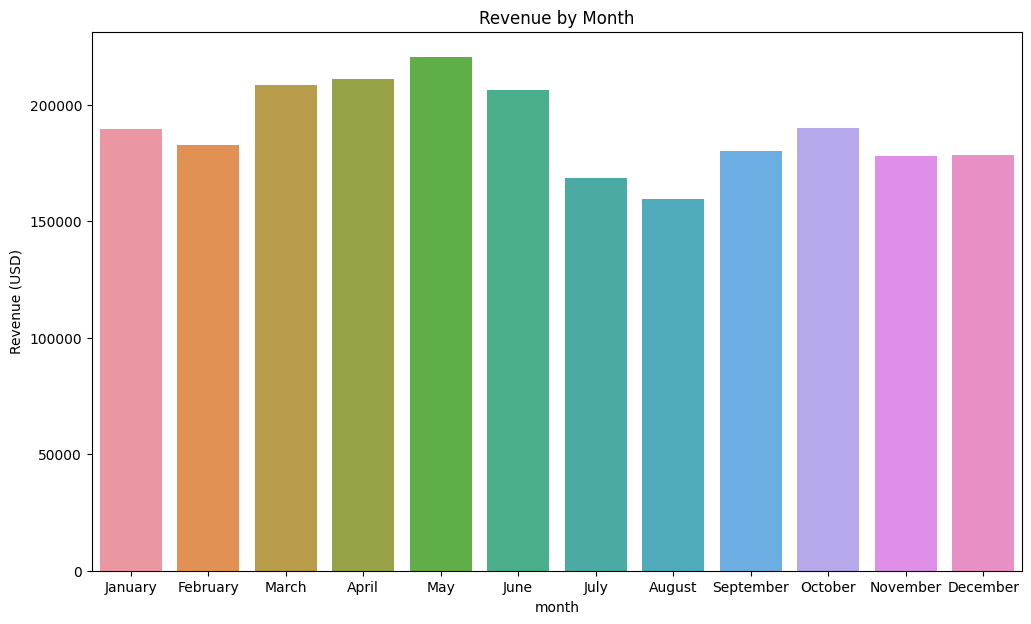

In [36]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_per_month.index,y=total_amount_per_month['fare_amount'])
ax.set_xticklabels(month_order)
ax.set_ylabel("Revenue (USD)")
plt.title("Revenue by Month")

The revenue per month shows that summer months July, August and september has less revenue than other as shown by trips per month.

# Now let's do some hypothesis test
Is there a relationship between fare amount and no of passenger.

In [37]:
from scipy import stats

In [38]:
df.describe()[['fare_amount','passenger_count']]

,fare_amount,passenger_count
count,199999.000000,199999.000000
mean,11.359892,1.684543
std,9.901760,1.385995
min,-52.000000,0.000000
25%,6.000000,1.000000
50%,8.500000,1.000000
75%,12.500000,2.000000
max,499.000000,208.000000


In [39]:
df.groupby('passenger_count')[['fare_amount']].mean()

,fare_amount
passenger_count,
0,9.439266
1,11.254158
2,11.784452
3,11.486731
4,11.642472
5,11.199698
6,12.158537
208,11.700000


As we can see the values of passenger count and fare amount are consistent and we don't see any relationship, but it can be because of random sampling. To find wether these values are statistically signifiacant, let's do some hypothesis testing.

**Hypothesis** <br>
Null Hypothesis: There is no difference between average fare amount based on the no of passenger. <br>
Alternative Hypothesis: There is difference between average fare amount based on the no of passenger. 

In [40]:
one_passenger = df[df['passenger_count'] == 1]['fare_amount']
two_passenger = df[df['passenger_count'] == 2]['fare_amount']
three_passenger = df[df['passenger_count'] == 3]['fare_amount']
four_passenger = df[df['passenger_count'] == 4]['fare_amount']
five_passenger = df[df['passenger_count'] == 5]['fare_amount']
six_passenger = df[df['passenger_count'] == 6]['fare_amount']

In [41]:
result = stats.f_oneway(one_passenger,two_passenger,three_passenger,four_passenger,five_passenger,six_passenger)
print("F-statistic:", result.statistic)
print("p-value:", result.pvalue)

F-statistic: 21.20953546719199
p-value: 2.838724710616687e-21


Since the p-value is less than significance level 0.05, so we reject the null hypothesis and conclude that there is a significant difference in the average fare amount based on the number of passengers.

# Now lets try to fit multiple linear regression model